<a href="https://colab.research.google.com/github/properallan/IM458-B/blob/master/kuramotoSivashinsky/kuramotoSivashinsky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt install subversion
!svn checkout https://github.com/properallan/IM458-B/trunk/kuramotoSivashinsky
%cd ./kuramotoSivashinsky

Reading package lists... Done
Building dependency tree       
Reading state information... Done
subversion is already the newest version (1.9.7-4ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Checked out revision 23.
/content/kuramotoSivashinsky


In [2]:
import KS
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

In [35]:
# define data and initialize simulation
L    = 200/(2*pi)
N    = 512
N    = 128
L    = 16
dt   = 0.25
ninittransients = 10000
tend = 50000 + ninittransients  #50000
tend = 6e4
tend = 150
TL1  = 0.094
dns  = KS.KS(L=L, N=N, dt=dt, tend=tend)


In [36]:
# intial conditions
dns.IC(u0=np.cos(dns.x/16)*(1+np.sin(dns.x/16)))

# simulate initial transient
dns.simulate()
# convert to physical space
dns.fou2real()

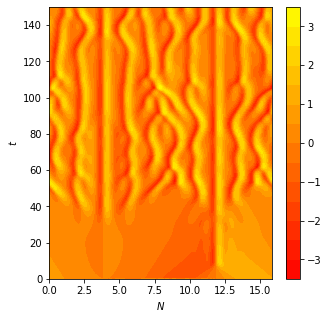

In [37]:
N_plot = 601
N_plot = len(dns.tt)
ninit = int(4e4+1e5)
ninit = 0
u_plot = dns.uu[ninit:ninit+N_plot,:]
t_plot = (dns.tt[ninit:ninit+N_plot] - dns.tt[ninit])*TL1
t_plot = (dns.tt[ninit:ninit+N_plot] - dns.tt[ninit])
# Plotting the contour plot
fig = plt.subplots(figsize=(5,5))
t, s = np.meshgrid(t_plot, np.array(range(N))+1)
t, s = np.meshgrid(t_plot, dns.x/2/pi)
#t, s = np.meshgrid(np.arange(N_plot), np.array(range(N))+1)
#plt.contourf(s, t, np.transpose(u_plot), 15, cmap=plt.get_cmap("seismic"), vmin=-3,vmax=3)
plt.contourf(s, t, np.transpose(u_plot)[::-1], 15, cmap=plt.get_cmap("autumn"))
plt.colorbar()
#plt.ylim([0,10])
#plt.xlim([0,512])

plt.xlabel(r"$N$")
plt.ylabel(r"$t$")
plt.show()


In [19]:
# define data and initialize simulation
L    = 200/2/pi
N    = 512
dt   = 0.25
ninittransients = 10000
tend = 50000 + ninittransients  
TL1  = 0.094
dns  = KS.KS(L=L, N=N, dt=dt, tend=tend)


In [20]:
# intial conditions
dns.IC(u0=np.cos(dns.x/dns.L)*(1. + np.sin(dns.x/dns.L)))

# simulate initial transient
dns.simulate()
# convert to physical space
dns.fou2real()

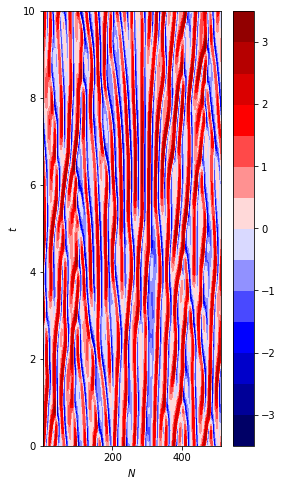

In [21]:
N_plot = 1000
#N_plot = len(dns.tt)
ninit = int(4e4+1e5)
u_plot = dns.uu[ninit:ninit+N_plot,:]
t_plot = (dns.tt[ninit:ninit+N_plot] - dns.tt[ninit])*TL1
#t_plot = (dns.tt[ninit:ninit+N_plot] - dns.tt[ninit])
# Plotting the contour plot
fig = plt.subplots(figsize=(4,8))
t, s = np.meshgrid(t_plot, np.array(range(N))+1)
#t, s = np.meshgrid(t_plot, dns.x/2/pi)
#t, s = np.meshgrid(np.arange(N_plot), np.array(range(N))+1)
#plt.contourf(s, t, np.transpose(u_plot), 15, cmap=plt.get_cmap("seismic"), vmin=-3,vmax=3)
plt.contourf(s, t, np.transpose(u_plot), 15, cmap=plt.get_cmap("seismic"))
plt.colorbar()
plt.ylim([0,10])
#plt.xlim([0,512])

plt.xlabel(r"$N$")
plt.ylabel(r"$t$")
plt.show()